<a href="https://colab.research.google.com/github/LDTSon/Room-for-rent-Price-Prediction/blob/main/District-address%20for%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [156]:
df = pd.read_csv('/content/Dataty2-named.csv')

In [157]:
df2 = df.drop_duplicates()
df2

,Price,Square,District,Parking,Drying yard,AC,Water heater,Washing machine,TV,Fridge,Kitchen,Elevator,Bed
0,1200000,115.0,8,0,0,0,0,1,0,1,1,0,0
1,3300000,18.0,Hoc Mon,0,0,0,1,0,0,0,0,0,1
2,1200000,60.0,10,0,0,1,0,1,0,1,1,0,1
3,1200000,45.0,10,0,0,1,0,1,0,1,1,0,1
4,3500000,25.0,9,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936,4000000,25.0,Go Vap,1,0,0,0,1,0,0,1,0,1
7937,6000000,35.0,Thu Duc,1,0,0,0,0,0,0,1,0,0
7938,3200000,18.0,Go Vap,1,0,0,0,0,0,0,1,0,1
7939,4000000,18.0,12,1,0,1,1,0,0,1,1,1,1


In [158]:
one_hot_locate = pd.get_dummies(df2.District)

In [159]:
df3 = pd.concat([df2, one_hot_locate], axis = 'columns')

In [160]:
df4 = df3.drop('District', axis = 'columns')

In [161]:
indexSquare = df4[(df4['Square'] >= 100) | (df4['Square'] <= 10) | (df4['Price'] >= 20000000) | (df4['Price'] <= 800000) ].index
df4.drop(indexSquare , inplace=True)
df4

,Price,Square,Parking,Drying yard,AC,Water heater,Washing machine,TV,Fridge,Kitchen,...,Thanh Xuan,Thu Dau Mot,Thu Duc,Thuan An,Tuy Hoa,Tuy Phuoc,Vinh,Vinh Yen,Vung Tau,Xuyen Moc
1,3300000,18.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200000,60.0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1200000,45.0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,3500000,25.0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,4600000,25.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936,4000000,25.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7937,6000000,35.0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7938,3200000,18.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7939,4000000,18.0,1,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [162]:
df4['Price on Square'] = df4['Price'] / df4['Square']


In [167]:
def remove_outlier_using_mstd(df):
  df_out = pd.DataFrame()
  m = np.mean(df['Price on Square'])
  st = np.std(df['Price on Square'])
  df_out = df[(df['Price on Square'] <= (m+st)) & (df['Price on Square'] > (m-st))]
  return df_out

df5 = remove_outlier_using_mstd(df4)

In [164]:
def remove_outlier_using_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)

    Higher_fence = Q3 + (1.5*IQR)

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    data.drop(IndexL_Outlier,inplace=True)
    data.drop(IndexH_Outlier,inplace=True)
    return data
df6 = remove_outlier_using_IQR(df5, 'Price')
df6 = remove_outlier_using_IQR(df5, 'Square')
df6

Lower fence is = 1050000.0
Higher fence is = 6250000.0
Lower fence is = 5.0
Higher fence is = 45.0


<ipython-input-164-df432a64486f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(IndexL_Outlier,inplace=True)
<ipython-input-164-df432a64486f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(IndexH_Outlier,inplace=True)
<ipython-input-164-df432a64486f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(IndexL_Outlier,inplace=True)
<ipython-input-164-df432a64486f>:16: SettingWithCopyWarning: 
A value is 

,Price,Square,Parking,Drying yard,AC,Water heater,Washing machine,TV,Fridge,Kitchen,...,Thu Dau Mot,Thu Duc,Thuan An,Tuy Hoa,Tuy Phuoc,Vinh,Vinh Yen,Vung Tau,Xuyen Moc,Price on Square
1,3300000,18.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,183333.333333
4,3500000,25.0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,140000.000000
5,4600000,25.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184000.000000
6,3800000,22.0,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,172727.272727
9,4450000,25.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,178000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,3000000,27.0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,111111.111111
7936,4000000,25.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,160000.000000
7937,6000000,35.0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,171428.571429
7938,3200000,18.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,177777.777778


In [135]:
X = df6.drop(columns=['Price', 'Price on Square'])

In [136]:
Y = df6.Price

<ipython-input-137-d3c277009982>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['LogPrice'] = np.log(df6['Price'])


<Axes: >

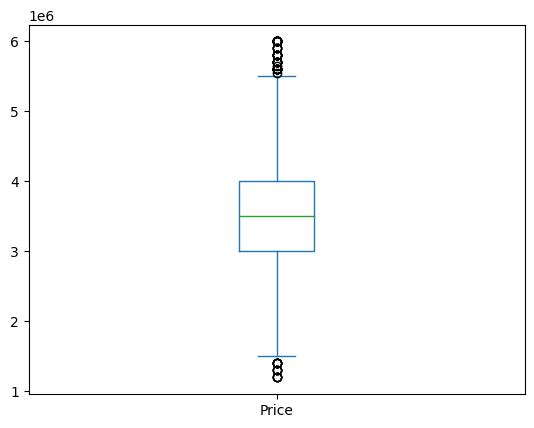

In [137]:
df6['LogPrice'] = np.log(df6['Price'])
df6.Price.plot.box()

<ipython-input-138-63620531c41f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['LogSquare'] = np.log(df6['Square'])


<Axes: >

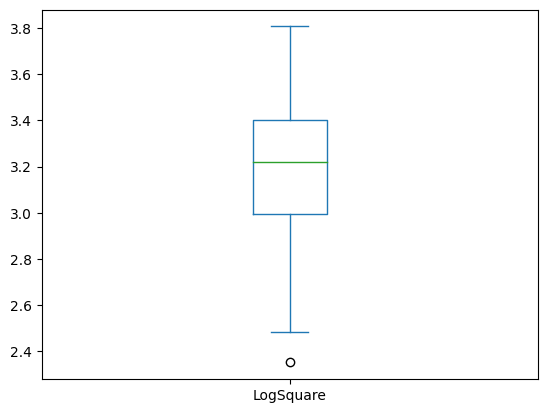

In [138]:
df6['LogSquare'] = np.log(df6['Square'])
df6.LogSquare.plot.box()

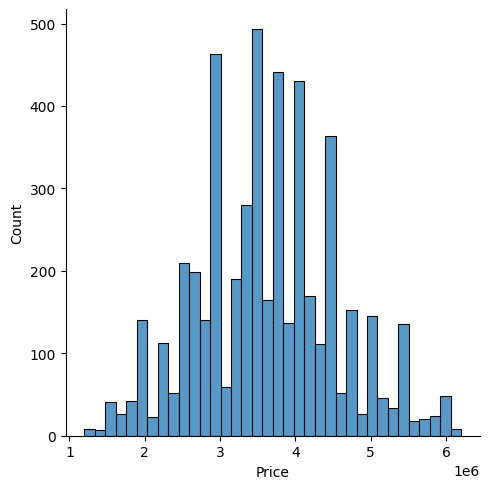

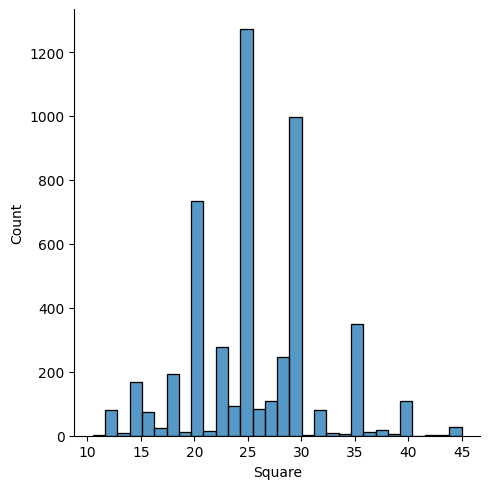

In [47]:
sns.displot(df6.Price)
sns.displot(df6.Square)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [49]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.598703327463326

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=6, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, Y, cv = cv)

array([0.61289356, 0.61412054, 0.63762901, 0.61362062, 0.59861095,
       0.59470484])

linear_regression


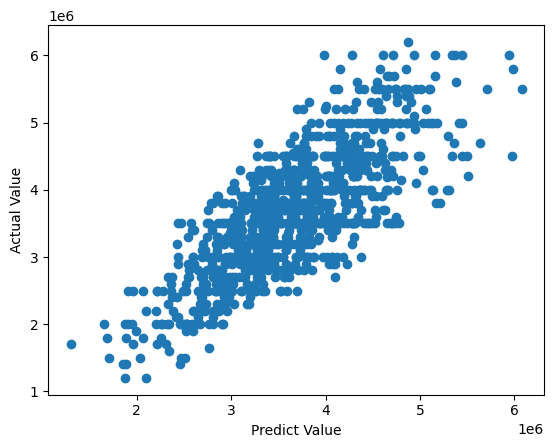

ridge_regression


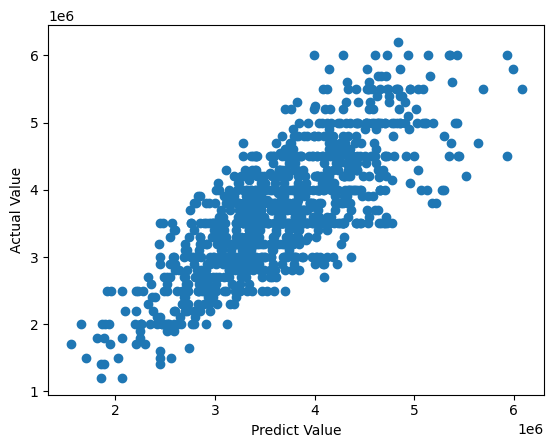

lasso_regression


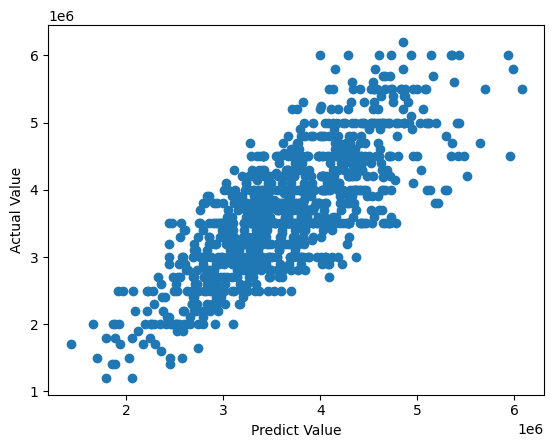

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp_model


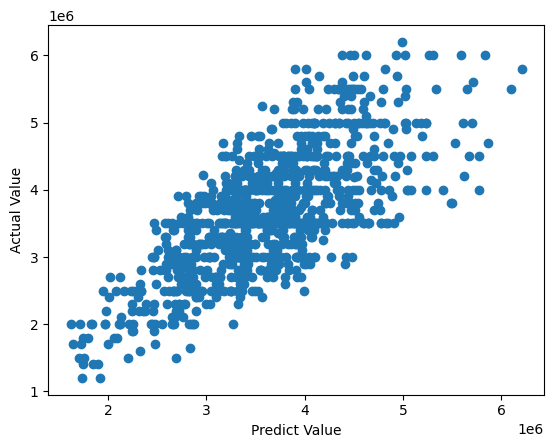

decision_tree


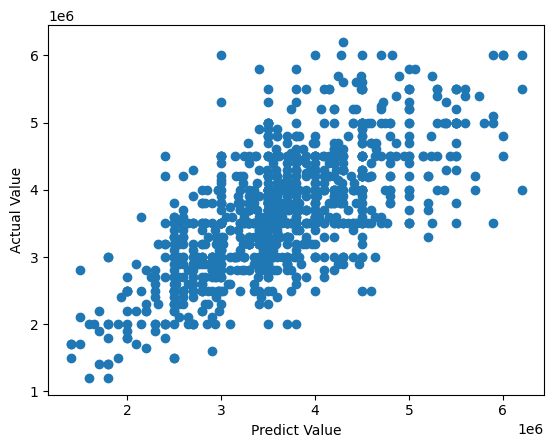

random_forest


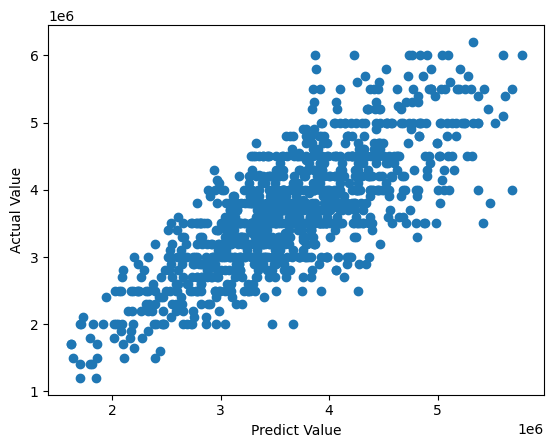

In [95]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


models = {
    'linear_regression': LinearRegression(),
    'ridge_regression': Ridge(4),
    'lasso_regression': Lasso(202),
    'mlp_model': MLPRegressor((100, 100)),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(100)
}

for (model_name, model) in models.items():
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  print(model_name)
  # print('MAE: ', mean_absolute_error(Y_test, y_pred))
  # print('RMSE: ', np.sqrt(mean_squared_error(Y_test, y_pred)))
  # print('r2 score: ', r2_score(Y_test, y_pred))
  # print()
  plt.scatter(y_pred, Y_test)
  plt.xlabel('Predict Value')
  plt.ylabel('Actual Value')
  plt.show()


In [90]:
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
x = []
y = []
for k in range(10, 20):
    print(f'k={k}:')
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, Y_train)
    x.append(k)
    y.append(knn_regressor.score(X_test, Y_test))
    Y_pred = knn_regressor.predict(X_test)
    print('MAE: ', mean_absolute_error(Y_test, Y_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(Y_test, Y_pred)))
    print('r2 score: ', r2_score(Y_test, Y_pred))
# pl = plt.plot(x, y)
# pl
# plt.scatter(Y_pred, Y_test)
# plt.xlabel('Predict Value')
# plt.ylabel('Actual Value')
# plt.show()

k=10:
MAE:  464094.8988035892
RMSE:  579162.0078614727
r2 score:  0.5932030065112444
k=11:
MAE:  465506.3680775854
RMSE:  582170.8210317151
r2 score:  0.5889653131427866
k=12:
MAE:  467850.7027251579
RMSE:  583677.8235629827
r2 score:  0.5868345569550931
k=13:
MAE:  465965.00214740395
RMSE:  578298.7449286807
r2 score:  0.5944147954156459
k=14:
MAE:  468718.87629967247
RMSE:  581934.8092960992
r2 score:  0.5892985120687362
k=15:
MAE:  467511.94828846795
RMSE:  580106.4293364502
r2 score:  0.5918752223922921
k=16:
MAE:  464334.88372382853
RMSE:  575385.8281752095
r2 score:  0.5984904067663077
k=17:
MAE:  468133.43053193355
RMSE:  579035.2137016655
r2 score:  0.5933811046469386
k=18:
MAE:  468133.6034673757
RMSE:  578966.7084422688
r2 score:  0.5934773125612698
k=19:
MAE:  468316.12441622507
RMSE:  578466.6367612412
r2 score:  0.5941792620396806


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_with_gridSearchCV(x, y):
  algos = {
      'lasso': {
          'model' : Lasso(),
          'params' : {
              'alpha': [195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205],
          }
      },
      'ridge': {
          'model' : Ridge(),
          'params' : {
              'alpha': [1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,20,30,35,40,45,50,55,100],
          }
      }

  }

  score = []
  cv = ShuffleSplit(n_splits= 7, test_size = 0.2, random_state = 0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X, Y)
    score.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
  return pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])
find_best_model_with_gridSearchCV(X, Y)

,model,best_score,best_params
0,lasso,0.616679,{'alpha': 202}
1,ridge,0.616829,{'alpha': 4}
